In [25]:
import requests
import re 
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba
from PIL import Image
from lxml import etree

In [26]:
headers = {
    'Referer': 'http://music.163.com',
    'Host': 'music.163.com',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8',
    'User-Agent': 'Chrome/10'
}

# 得到某一首歌的歌词
def get_song_lyric(headers, lyric_url):
    res = requests.request('GET', lyric_url, headers=headers)
    if 'lrc' in res.json():
        lyric = res.json()['lrc']['lyric']
        new_lyric = re.sub(r'[\d:[\]]', '', lyric)
        return new_lyric
    else:
        return ''
        print(res.josn)

In [27]:
# 去掉停用词
def remove_stop_words(f):
    stop_words = ['作词', '作曲', '编曲', 'Arranger', '录音', '混音', '人声', 'Vocal', '弦乐', 'Keyboard', '键盘', '编辑', '助理', 'Assistants', 'Mixing', 'Editing', 'Recording', '音乐', '制作', 'Producer', '发行', 'produced', 'and', 'distributed']
    for stop_word in stop_words:
        f = f.replace(stop_word, '')
    return f

In [28]:
# 生成词云
def create_word_cloud(f):
    print('根据词频、开始生成词云 ---')
    f = remove_stop_words(f)
    cut_text = ' '.join(jieba.cut(f, cut_all=False, HMM=True))
    wc = WordCloud(font_path='./SimHei.ttf', max_words=100, width=2000, height=1200,)
    print(cut_text)

    wordcloud = wc.generate(cut_text)
    # 写词云图片
    wordcloud.to_file('wordcloud.jpg')
    # 显示词云文件
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

In [29]:
# 得到指定歌手页面、热门前 50 的歌曲 ID、歌曲名
def get_songs(artist_id):
    page_url = 'https://music.163.com/artist?id=' + artist_id
    # 获取网页 HTML
    res = requests.request('GET', page_url, headers=headers)
    # 用 XPath 解析前 50 首热门歌曲
    html = etree.HTML(res.text)
    href_xpath = "//*[@id='hotsong-list']//a/@href"
    name_xpath = "//*[@id='hotsong-list']//a/text()"
    hrefs = html.xpath(href_xpath)
    names = html.xpath(name_xpath)
    # 设置热门歌曲的 ID、歌曲名称
    song_ids = []
    song_names = []
    for href, name in zip(hrefs, names):
        song_ids.append(href[9:])
        song_names.append(name)
        print(href, ' ', name)
    return song_ids, song_names

In [30]:
# 设置歌手 ID、毛不易为 12138269
artist_id = '12138269'
[song_ids, song_names] = get_songs(artist_id)

/song?id=569213220   像我这样的人
/song?id=569200213   消愁
/song?id=1417862046   呓语
/song?id=569200210   给你给我
/song?id=569214250   借
/song?id=569214247   平凡的一天
/song?id=1953125353   看得最远的地方
/song?id=536099160   不染
/song?id=569200212   一荤一素
/song?id=1969842586   聊聊
/song?id=1903149553   无名的人
/song?id=569212211   盛夏
/song?id=525278524   无问
/song?id=1972657474   小空
/song?id=1951513623   分分钟需要你 (Live)
/song?id=1411558182   东北民谣
/song?id=1940770243   遥远的她 (Live)
/song?id=569212210   想你想你
/song?id=1860567964   生活在别处的你 Another me
/song?id=569214252   如果有一天我变得很有钱
/song?id=1947537071   最佳损友 (Live)
/song?id=1449782341   入海
/song?id=1407214788   二零三
/song?id=1417849873   一程山路
/song?id=1953436735   下一站天后 (Live)
/song?id=1417856017   小王
/song?id=1960868406   可惜我是水瓶座 (Live)
/song?id=1970584919   出去玩
/song?id=569200211   哎哟
/song?id=1334270281   别再闹了
/song?id=1953435812   孤独患者 (Live)
/song?id=1957017400   弥敦道 (Live)
/song?id=1945355027   星语心愿 (Live)
/song?id=1383923446   17
/song?id=1413304559   胡同
/song?id

In [31]:
# 所有歌词
all_word = ''
# 获取每首歌歌词
for (song_id, song_name) in zip(song_ids, song_names):
    # 歌词 API URL
    lyric_url = 'http://music.163.com/api/song/lyric?os=pc&id=' + song_id + '&lv=-1&kv=-1&tv=-1'
    lyric = get_song_lyric(headers, lyric_url)
    all_word = all_word + ' ' + lyric
    print(song_name)

像我这样的人
消愁
呓语
给你给我
借
平凡的一天
看得最远的地方
不染
一荤一素
聊聊
无名的人
盛夏
无问
小空
分分钟需要你 (Live)
东北民谣
遥远的她 (Live)
想你想你
生活在别处的你 Another me
如果有一天我变得很有钱
最佳损友 (Live)
入海
二零三
一程山路
下一站天后 (Live)
小王
可惜我是水瓶座 (Live)
出去玩
哎哟
别再闹了
孤独患者 (Live)
弥敦道 (Live)
星语心愿 (Live)
17
胡同
深夜一角
南一道街
不再犹豫 (Live)
忽然之间 (Live)
水乡
东方之珠 (Live)
小王日记
感觉自己是巨星
芬芳一生
等
借 (Live)
城市傍晚
若有缘由
眉飞色舞 (Live)
我和我的祖国 (Live)


根据词频、开始生成词云 ---
  .       毛 不易 
 .       毛 不易 
 .       赵兆 / 宋涛 
 .   人     李健 / 赵兆 
 . 
 . 像 我 这样 优秀 的 人 
 . 本该 灿烂 过 一生 
 . 怎么 二十多年 到头来 
 . 还 在 人 海里 浮沉 
 . 
 . 像 我 这样 聪明 的 人 
 . 早就 告别 了 单纯 
 . 怎么 还是 用 了 一段 情 
 . 去 换 一身 伤痕 
 . 
 . 像 我 这样 迷茫 的 人 
 . 像 我 这样 寻找 的 人 
 . 像 我 这样 碌碌无为 的 人 
 . 你 还 见 过 多少 人 
 . 
 . 像 我 这样 庸俗 的 人 
 . 从不 喜欢 装 深沉 
 . 怎么 偶尔 听到 老歌 时 
 . 忽然 也 晃 了 神 
 . 像 我 这样 懦弱 的 人 
 . 凡事 都 要 留 几分 
 . 怎么 曾经 也 会 为了 谁 
 . 想过 奋不顾身 
 . 
 . 像 我 这样 迷茫 的 人 
 . 像 我 这样 寻找 的 人 
 . 像 我 这样 碌碌无为 的 人 
 . 你 还 见 过 多少 人 
 . 
 . 像 我 这样 孤单 的 人 
 . 像 我 这样 傻 的 人 
 . 像 我 这样 不甘 平凡 的 人 
 . 世界 上 有 多少 人 
 . 
 . 像 我 这样 迷茫 的 人 
 . 像 我 这样 寻找 的 人 
 . 像 我 这样 碌碌无为 的 人 
 . 你 还 见 过 多少 人 
 . 
 . 像 我 这样 孤单 的 人 
 . 像 我 这样 傻 的 人 
 . 像 我 这样 不甘 平凡 的 人 
 . 世界 上 有 多少 人 
 . 
 . 像 我 这样 莫名其妙 的 人 
 . 会 不会 有人 心疼 
 . 
 . 
 .   口琴     刘晓光 
 .       赵兆 
 .   吉他     薛峰 
 .   贝斯     韩阳 
 .   鼓     武勇恒 
 .       国际 首席 爱乐乐团 International   Master   Philharmonic   Orchestra 
 .       周天 澈 
 .   母带     Joe   LaPorta   . （ Sterling   Soun

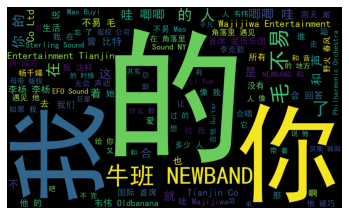

In [32]:
# 根据词频生成词云
create_word_cloud(all_word)